<a href="https://colab.research.google.com/github/kumaradityabtps/Learning-PyTorch-from-scratch/blob/main/PT_Day6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
what_were_covering = {1: "data (prepate & load)",
                      2: "Build model",
                      3: "filling the model to data (training)",
                      4: "Making prediction & evaluating model",
                      5: "Saving & Loading a model",
                      6: "Putting it all together"
                    }

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.8.0+cu126'

In [ ]:
from os import X_OK
# create *known* Parameters
weight = 0.7
bias =0.3

#create
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

### Splitting data into Training and test sets

In [ ]:
# create a train?test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Building Functions to visualize our data

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot taining data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  # plot taining data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, labels="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});


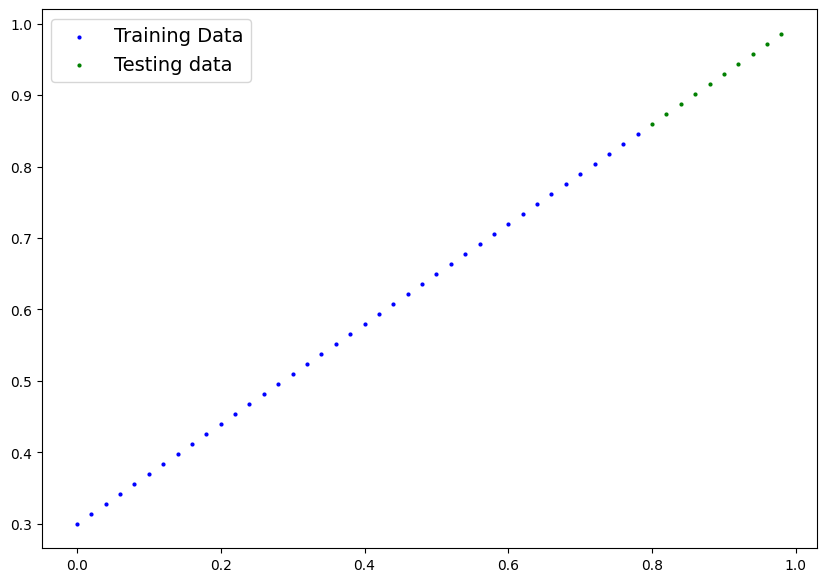

In [ ]:
plot_predictions();

### 2. Build Model

#### Our first PyTorch model!
#### This is very exciting..... let's do it!

In [ ]:
# Create linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.weights * x + self.bias

In [ ]:
# Create arandom seed
torch.manual_seed(42)

# Create an instance of the model (this is asubclass of nn.Module)

# Creating a tensor

In [ ]:
# using empty
a = torch.empty(2,3)

In [ ]:
# check type
type(a)

torch.Tensor

In [ ]:
# using zeros
torch.zeros(2,3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [ ]:
# using ones
torch.ones(2,3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
# torch .rand
torch.rand(2,3)

tensor([[0.4035, 0.5449, 0.9200],
        [0.9423, 0.7629, 0.6432]])

In [ ]:
# using tensors
torch.tensor([[1, 2, 3],[4, 5, 6]])

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
# other ways

# arange
print("using arange ->", torch.arange(0,10,2))

#using linspace
print("using linspace ->", torch.linspace(0,10,10))

# using eye
print("using eye ->", torch.eye(5))

# using full
print("using full ->", torch.full((3,3), 5))

using arange -> tensor([0, 2, 4, 6, 8])
using linspace -> tensor([ 0.0000,  1.1111,  2.2222,  3.3333,  4.4444,  5.5556,  6.6667,  7.7778,
         8.8889, 10.0000])
using eye -> tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])
using full -> tensor([[5, 5, 5],
        [5, 5, 5],
        [5, 5, 5]])


# Tensor Shapes

In [ ]:
x = torch.tensor([[1, 2, 3],[4, 5, 6]])
x

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
x.shape

torch.Size([2, 3])

In [ ]:
torch.empty_like(x)

tensor([[          548468736,           548860336, 4671734013112731420],
        [4687746815133016974,                  48,                  48]])

In [ ]:
torch.ones_like(x)

tensor([[1, 1, 1],
        [1, 1, 1]])

# Tensor Data Type

In [ ]:
x.dtype

torch.int64

In [ ]:
# assin dtype
torch.tensor([1.0, 2.0, 3.0], dtype=torch.int32)

tensor([1, 2, 3], dtype=torch.int32)

In [ ]:
torch.tensor([1, 2, 3], dtype=torch.float64)

tensor([1., 2., 3.], dtype=torch.float64)

In [ ]:
# using to()
x.to(torch.float32)

tensor([[1., 2., 3.],
        [4., 5., 6.]])

# Mathematical operations

In [ ]:
x = torch.rand(2,2)
x

tensor([[0.0972, 0.6102],
        [0.8789, 0.5828]])

In [ ]:
# addition
x + 2
# substraction
x - 2
# multiplication
x * 3
# division
x / 3
# int division
(x * 100)//3
# mod
((x * 100)//3)%2
# power
x**2


tensor([[0.0094, 0.3723],
        [0.7724, 0.3397]])

In [ ]:
a = torch.rand(2,3)
b = torch.rand(2,3)

print(a)
print(b)

tensor([[0.3052, 0.3699, 0.8262],
        [0.5218, 0.2592, 0.9779]])
tensor([[0.0441, 0.6694, 0.8918],
        [0.8429, 0.2520, 0.6707]])


In [ ]:
# add
a + b

tensor([[0.3493, 1.0393, 1.7179],
        [1.3647, 0.5112, 1.6486]])

In [ ]:
# sub
a - b

tensor([[ 0.2612, -0.2995, -0.0656],
        [-0.3212,  0.0073,  0.3073]])

In [ ]:
# multiply
a * b

tensor([[0.0134, 0.2476, 0.7368],
        [0.4398, 0.0653, 0.6559]])

In [ ]:
# division
a / b

tensor([[6.9279, 0.5526, 0.9264],
        [0.6190, 1.0288, 1.4581]])

In [ ]:
# power
a ** b

tensor([[0.9491, 0.5139, 0.8434],
        [0.5779, 0.7117, 0.9851]])

In [ ]:
# mod
a % b

tensor([[0.0409, 0.3699, 0.8262],
        [0.5218, 0.0073, 0.3073]])

In [ ]:
c = torch.tensor([1, -2, 3, -4])

In [ ]:
# abs
torch.abs(c)

tensor([1, 2, 3, 4])

In [ ]:
# negative
torch.neg(c)

tensor([-1,  2, -3,  4])

In [ ]:
d = torch.tensor([1.9, 2.3, 3.7, 4.4])

In [ ]:
# round
torch.round(d)

tensor([2., 2., 4., 4.])

In [ ]:
# ceil
torch.ceil(d)

tensor([2., 3., 4., 5.])

In [ ]:
# floor
torch.floor(d)

tensor([1., 2., 3., 4.])

In [ ]:
#clamp
torch.clamp(d, min=2, max=3)

tensor([2.0000, 2.3000, 3.0000, 3.0000])

# 3. Reduction operation

In [ ]:
e = torch.randint(size=(2,3), low=0, high=10)
e

tensor([[9, 1, 4],
        [7, 1, 4]])

In [ ]:
# sum
torch.sum(e)

# sum along colums
torch.sum(e, dim=0)

# sum along rows
torch.sum(e, dim=1)


tensor([14, 12])

In [ ]:
# median
torch.median(e)

tensor(4)

In [ ]:
# max and min
torch.min(e)
torch.max(e)


tensor(9)

# 4. Matrix operations

In [ ]:
f = torch.randint(size=(2,3), low=0, high=10)
g = torch.randint(size=(3,2), low=0, high=10)

print(f)
print(g)

tensor([[7, 7, 4],
        [7, 6, 8]])
tensor([[8, 9],
        [3, 1],
        [2, 4]])


In [ ]:
# matrix multiplication
torch.matmul(f, g)

tensor([[ 85,  86],
        [ 90, 101]])

In [ ]:
vector1 = torch.tensor([1,2])
vector2 = torch.tensor([3,4])

In [ ]:
# dot product
torch.dot(vector1, vector2)

tensor(11)

In [ ]:
# transpose
torch .transpose(f, 0, 1)

tensor([[7, 7],
        [7, 6],
        [4, 8]])

In [ ]:
h = torch.randint(size=(3,3), low=0, high=10, dtype=torch.float32)

In [ ]:
h

tensor([[2., 0., 1.],
        [6., 0., 5.],
        [1., 0., 7.]])

In [ ]:
# determinant
torch.det(h)

tensor(-0.)

In [ ]:
#inverse
torch.inverse(h)

tensor([[-0.2791,  0.2093,  0.3023],
        [-0.1628,  0.3721,  0.0930],
        [ 0.6512, -0.4884, -0.3721]])

# Comarision Operations

In [ ]:
i = torch.randint(size=(2,3), low=0, high=10)
j = torch.randint(size=(2,3), low=0, high=10)

print(i)
print(j)

tensor([[6, 2, 7],
        [2, 3, 4]])
tensor([[0, 8, 4],
        [0, 9, 0]])


In [ ]:
# greater than
i > j
# less than
i < j
# equal to
i == j
# not equal to
i != j
# greater than equal to
i >= j


# less than equal to
i<=j

tensor([[False,  True, False],
        [False,  True, False]])

# 6. special Functions

In [ ]:
k = torch.randint(size=(2,3), low=0, high=10, dtype=torch.float32)
k

tensor([[0., 4., 2.],
        [5., 2., 5.]])

In [ ]:
# log
torch.log(k)

tensor([[  -inf, 1.3863, 0.6931],
        [1.6094, 0.6931, 1.6094]])

In [ ]:
# exp
torch.exp(k)

tensor([[  1.0000,  54.5981,   7.3891],
        [148.4132,   7.3891, 148.4132]])

In [ ]:
#sqrt
torch.sqrt(k)

tensor([[0.0000, 2.0000, 1.4142],
        [2.2361, 1.4142, 2.2361]])

In [ ]:
# sigmoid
torch.sigmoid(k)

tensor([[0.5000, 0.9820, 0.8808],
        [0.9933, 0.8808, 0.9933]])

In [ ]:
# sofmax
torch.softmax(k, dim=0)

tensor([[0.0067, 0.8808, 0.0474],
        [0.9933, 0.1192, 0.9526]])

In [ ]:
# relu
torch.relu(k)

tensor([[0., 4., 2.],
        [5., 2., 5.]])

# Inplace Operations

In [ ]:
m = torch.rand(2,3)
n = torch.rand(2,3)

print(m)
print(n)

tensor([[0.9131, 0.6616, 0.1880],
        [0.6238, 0.8443, 0.8423]])
tensor([[0.7208, 0.3960, 0.8134],
        [0.9761, 0.8474, 0.4390]])


In [ ]:
m + n

tensor([[1.6338, 1.0577, 1.0014],
        [1.5999, 1.6918, 1.2812]])

In [ ]:
m.add_(n)

tensor([[1.6338, 1.0577, 1.0014],
        [1.5999, 1.6918, 1.2812]])

In [ ]:
m

tensor([[1.6338, 1.0577, 1.0014],
        [1.5999, 1.6918, 1.2812]])

In [ ]:
n

tensor([[0.7208, 0.3960, 0.8134],
        [0.9761, 0.8474, 0.4390]])

In [ ]:
m.relu_()

tensor([[1.6338, 1.0577, 1.0014],
        [1.5999, 1.6918, 1.2812]])

# Copying a tensor


In [ ]:
a = torch.rand(2,3)
a

tensor([[0.0752, 0.9026, 0.0344],
        [0.3064, 0.9412, 0.1046]])

In [ ]:
b = a

In [ ]:
b

tensor([[0.0752, 0.9026, 0.0344],
        [0.3064, 0.9412, 0.1046]])

In [ ]:
a[0][0] = 0

In [ ]:
a


tensor([[0.0000, 0.9026, 0.0344],
        [0.3064, 0.9412, 0.1046]])

In [ ]:
b

tensor([[0.0000, 0.9026, 0.0344],
        [0.3064, 0.9412, 0.1046]])

In [ ]:
id(a)
id(b)

133481025035776

In [ ]:
# solution of this problem is
b = a.clone()
